# Adult Census Income Analysis - Decision TREE, Random Forest, CV, Tuning the model with Ensemble Techniques(Baaging , ADAboost)


### A stable and optimized model to predict the income of a given population, which is labelled as <= 50K and >50K. The attributes (predictors) are age, working class type, marital status, gender, race etc.
#### Following are the steps, 
#### 1.clean and prepare the data,
#### 2.Analyze Data,
#### 3.Label Encoding,
#### 4.Build a decision tree and Random forest with default hyperparameters,
#### 5.Build several classifier models to compare, cross validate and for voting classifier model
#### 6.choose the optimal hyperparameters using grid search cross-validation.
#### 7.Build optimized Random forest model with tuned hyperparameters from grid search model
#### 8.Increase Accuracy by Applying Ensemble technique BAGGING to our tuned random forest model
#### 9.Increase Accuracy by Applying Ensemble technique ADABOOST to our tuned random forest model
####  I hope you enjoy this notebook and find it useful!

## Clean & Analyze Data,

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
# from sklearn.cross_validation import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [5]:
from aif360.datasets import StandardDataset
from aif360.metrics import BinaryLabelDatasetMetric, ClassificationMetric
import matplotlib.patches as patches
from aif360.algorithms.preprocessing import Reweighing
#from packages import *
#from ml_fairness import *
import matplotlib.pyplot as plt
import seaborn as sns



from IPython.display import Markdown, display

In [6]:
from sklearn.model_selection import cross_val_score

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
data =  pd.read_csv("../../Data/adult.csv")

In [6]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [9]:
# select all categorical variables
df_categorical = data.select_dtypes(include=['object'])

# checking whether any other columns contain a "?"
df_categorical.apply(lambda x: x=="?", axis=0).sum()

workclass         1836
education            0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
native.country     583
income               0
dtype: int64

In [10]:
data[data['workclass'] == '?' ].count()

age               1836
workclass         1836
fnlwgt            1836
education         1836
education.num     1836
marital.status    1836
occupation        1836
relationship      1836
race              1836
sex               1836
capital.gain      1836
capital.loss      1836
hours.per.week    1836
native.country    1836
income            1836
dtype: int64

In [11]:
data[data['occupation'] == '?' ].count()

age               1843
workclass         1843
fnlwgt            1843
education         1843
education.num     1843
marital.status    1843
occupation        1843
relationship      1843
race              1843
sex               1843
capital.gain      1843
capital.loss      1843
hours.per.week    1843
native.country    1843
income            1843
dtype: int64

In [12]:
data[data['native.country'] == '?' ].count()

age               583
workclass         583
fnlwgt            583
education         583
education.num     583
marital.status    583
occupation        583
relationship      583
race              583
sex               583
capital.gain      583
capital.loss      583
hours.per.week    583
native.country    583
income            583
dtype: int64

In [13]:
(1836/32561)/100

0.0005638647461687295

 ### Missing Value % is very insignificant  so we will drop those values

In [14]:
data.count()

age               32561
workclass         32561
fnlwgt            32561
education         32561
education.num     32561
marital.status    32561
occupation        32561
relationship      32561
race              32561
sex               32561
capital.gain      32561
capital.loss      32561
hours.per.week    32561
native.country    32561
income            32561
dtype: int64

In [15]:
data = data[data["workclass"] != "?" ]

In [16]:
data = data[data["occupation"] != "?" ]

In [17]:
data = data[data["native.country"] != "?" ]

In [18]:
data.count()

age               30162
workclass         30162
fnlwgt            30162
education         30162
education.num     30162
marital.status    30162
occupation        30162
relationship      30162
race              30162
sex               30162
capital.gain      30162
capital.loss      30162
hours.per.week    30162
native.country    30162
income            30162
dtype: int64

In [19]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


In [20]:
data["income"].unique()

array(['<=50K', '>50K'], dtype=object)

In [21]:
data["income"] = data["income"].map({'<=50K' : 0, '>50K': 1})
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,0
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,0


In [22]:
data["income"].unique()

array([0, 1], dtype=int64)

## Label Encoding

In [23]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

catogorical_data = data.select_dtypes(include =['object'])

In [24]:
catogorical_data.head()

,workclass,education,marital.status,occupation,relationship,race,sex,native.country
1,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,United-States
3,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,United-States
4,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,United-States
5,Private,HS-grad,Divorced,Other-service,Unmarried,White,Female,United-States
6,Private,10th,Separated,Adm-clerical,Unmarried,White,Male,United-States


In [25]:
catogorical_data = catogorical_data.apply(le.fit_transform)

In [26]:
catogorical_data.head()

,workclass,education,marital.status,occupation,relationship,race,sex,native.country
1,2,11,6,3,1,4,0,38
3,2,5,0,6,4,4,0,38
4,2,15,5,9,3,4,0,38
5,2,11,0,7,4,4,0,38
6,2,0,5,0,4,4,1,38


In [27]:
data = data.drop(catogorical_data.columns, axis=1)
data = pd.concat([data, catogorical_data], axis=1)
data.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income,workclass,education,marital.status,occupation,relationship,race,sex,native.country
1,82,132870,9,0,4356,18,0,2,11,6,3,1,4,0,38
3,54,140359,4,0,3900,40,0,2,5,0,6,4,4,0,38
4,41,264663,10,0,3900,40,0,2,15,5,9,3,4,0,38
5,34,216864,9,0,3770,45,0,2,11,0,7,4,4,0,38
6,38,150601,6,0,3770,40,0,2,0,5,0,4,4,1,38


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 1 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             30162 non-null  int64
 1   fnlwgt          30162 non-null  int64
 2   education.num   30162 non-null  int64
 3   capital.gain    30162 non-null  int64
 4   capital.loss    30162 non-null  int64
 5   hours.per.week  30162 non-null  int64
 6   income          30162 non-null  int64
 7   workclass       30162 non-null  int32
 8   education       30162 non-null  int32
 9   marital.status  30162 non-null  int32
 10  occupation      30162 non-null  int32
 11  relationship    30162 non-null  int32
 12  race            30162 non-null  int32
 13  sex             30162 non-null  int32
 14  native.country  30162 non-null  int32
dtypes: int32(8), int64(7)
memory usage: 2.8 MB


In [43]:
data['income'] = data['income'].astype('int')


## Decision Tree Model with Default parameters

In [29]:
x=data.drop('income',axis=1)
y=data['income']
#Train & Test split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state= 476)

In [30]:
tree = DecisionTreeClassifier()
model_tree = tree.fit(x_train,y_train)
model_tree

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [31]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [32]:
model_tree = tree.fit(x_train,y_train)
pred_tree = tree.predict(x_test)
a1 = accuracy_score(y_test,pred_tree)
print("The Accuracy of Desicion Tree is ", a1)

The Accuracy of Desicion Tree is  0.8125759752458835


In [33]:
confusion_matrix(y_test,pred_tree)

array([[5931,  857],
       [ 839, 1422]])

In [34]:
print(classification_report(y_test, pred_tree))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87      6788
           1       0.62      0.63      0.63      2261

   micro avg       0.81      0.81      0.81      9049
   macro avg       0.75      0.75      0.75      9049
weighted avg       0.81      0.81      0.81      9049



## Random Forest Model with Default parameters

In [35]:
rf = RandomForestClassifier()
model_rf = rf.fit(x_train,y_train)
pred_rf = rf.predict(x_test)
a2 = accuracy_score(y_test, pred_rf)
print("The Accuracy of Random Forest is ", a2)

The Accuracy of Random Forest is  0.8450657531218919


## Logistic Regression & KNN model

In [36]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()

model_lg = lg.fit(x_train,y_train)
pred_lg = lg.predict(x_test)
a3 = accuracy_score(y_test, pred_lg)
print("The Accuracy of logistic regression is ", a3)

The Accuracy of logistic regression is  0.7911371422256603


In [37]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier()

In [38]:
model_knn =knn.fit(x_train,y_train) 
pred_knn = knn.predict(x_test)
a4 = accuracy_score(y_test, pred_knn)
print("The Accuracy of KNN is ", a4)

The Accuracy of KNN is  0.7596419493866725


# Build optimized Random forest model with tuned hyperparameters from grid search model  

In [39]:
rf_param = {
    "n_estimators": [25,50,100],
    "criterion" : ["gini"],
    "max_depth" : [3,4,5,6],
    "max_features" : ["auto","sqrt","log2"],
    "random_state" : [123]
}

In [40]:
GridSearchCV(rf, rf_param, cv = 5)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [25, 50, 100], 'criterion': ['gini'], 'max_depth': [3, 4, 5, 6], 'max_features': ['auto', 'sqrt', 'log2'], 'random_state': [123]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [41]:
grid =GridSearchCV(rf, rf_param, cv = 5)

In [42]:
grid.fit(x_train,y_train).best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'auto',
 'n_estimators': 100,
 'random_state': 123}

In [43]:
rf1 = RandomForestClassifier(criterion = 'gini',
    max_depth = 6,
    max_features = 'auto',
    n_estimators = 100,
    random_state = 123)
model_rf1 = rf1.fit(x_train,y_train)
pred_rf1 = rf1.predict(x_test)
accuracy_score(y_test, pred_rf1)

0.8462813570560282

# K FOLD Cross Validation

In [44]:
cross_val_score(tree,x_train,y_train,scoring= "accuracy", cv=10)

array([0.79024621, 0.81628788, 0.79498106, 0.79403409, 0.79971591,
       0.80776515, 0.80672667, 0.79952607, 0.79905213, 0.80805687])

In [45]:
cross_val_score(tree,x,y,scoring= "accuracy", cv=5).mean()

0.7639760250539661

In [46]:
cross_val_score(rf,x_train,y_train,scoring= "accuracy", cv=5).mean()

0.8446926761990472

In [47]:
cross_val_score(lg,x_train,y_train,scoring= "accuracy", cv=5).mean()

0.7881883610197511

In [48]:
cross_val_score(knn,x_train,y_train,scoring= "accuracy", cv=5).mean()

0.7642686401045582

# Voting Classifier model

In [49]:
from sklearn.ensemble import VotingClassifier

In [50]:
model_vote = VotingClassifier(estimators=[('logistic Regression', lg), ('random forrest', rf), ('knn neighbors', knn),(' decision tree', tree)], voting='soft')
model_vote = model_vote.fit(x_train, y_train)

In [51]:
vote_pred = model_vote.predict(x_test)

In [52]:
a5 =  accuracy_score(y_test, vote_pred)
print("The Accuracy of voting classifier is ", a5)

The Accuracy of voting classifier is  0.8371090728257266


In [53]:
print(classification_report(y_test, vote_pred))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90      6788
           1       0.77      0.50      0.60      2261

   micro avg       0.84      0.84      0.84      9049
   macro avg       0.81      0.72      0.75      9049
weighted avg       0.83      0.84      0.82      9049



# Ensemble Technique Bagging 

## Increase Accuracy by Applying Ensemble technique BAGGING to our tuned random forest model

In [54]:
from sklearn.ensemble import BaggingClassifier

In [55]:
bagg = BaggingClassifier(base_estimator=rf1,n_estimators=15)

In [56]:
model_bagg =bagg.fit(x_train,y_train) 
pred_bagg = bagg.predict(x_test)

In [57]:
a6 = accuracy_score(y_test, pred_bagg)
print("The Accuracy of BAAGING is ", a6)

The Accuracy of BAAGING is  0.8460603381589126


In [58]:
confusion_matrix(y_test,pred_bagg)

array([[6496,  292],
       [1101, 1160]])

In [59]:
print(classification_report(y_test, pred_bagg))

              precision    recall  f1-score   support

           0       0.86      0.96      0.90      6788
           1       0.80      0.51      0.62      2261

   micro avg       0.85      0.85      0.85      9049
   macro avg       0.83      0.74      0.76      9049
weighted avg       0.84      0.85      0.83      9049



#  Ensemble Technique  ADA Boost 

## Increase Accuracy by Applying Ensemble technique ADABOOST to our tuned random forest model

In [60]:
from sklearn.ensemble import AdaBoostClassifier

In [61]:
Adaboost = AdaBoostClassifier(base_estimator=rf1, n_estimators=15)

In [62]:
model_boost =Adaboost.fit(x_train,y_train) 
pred_boost = Adaboost.predict(x_test)

In [63]:
a7 = accuracy_score(y_test, pred_boost)
print("The Accuracy of BOOSTING is ", a7)

The Accuracy of BOOSTING is  0.8660625483478838


In [64]:
confusion_matrix(y_test,pred_boost)

array([[6393,  395],
       [ 817, 1444]])

In [65]:
print(classification_report(y_test, pred_boost))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      6788
           1       0.79      0.64      0.70      2261

   micro avg       0.87      0.87      0.87      9049
   macro avg       0.84      0.79      0.81      9049
weighted avg       0.86      0.87      0.86      9049



## Fairness

In [10]:
# This DataFrame is created to stock differents models and fair metrics that we produce in this notebook
algo_metrics = pd.DataFrame(columns=['model', 'fair_metrics', 'prediction', 'probs'])

def add_to_df_algo_metrics(algo_metrics, model, fair_metrics, preds, probs, name):
    return algo_metrics.append(pd.DataFrame(data=[[model, fair_metrics, preds, probs]], columns=['model', 'fair_metrics', 'prediction', 'probs'], index=[name]))

In [11]:
def fair_metrics(dataset, pred, pred_is_dataset=False):
    if pred_is_dataset:
        dataset_pred = pred
    else:
        dataset_pred = dataset.copy()
        dataset_pred.labels = pred
    
    cols = ['statistical_parity_difference', 'equal_opportunity_difference', 'average_abs_odds_difference',  'disparate_impact', 'theil_index']
    obj_fairness = [[0,0,0,1,0]]
    
    fair_metrics = pd.DataFrame(data=obj_fairness, index=['objective'], columns=cols)
    
    for attr in dataset_pred.protected_attribute_names:
        idx = dataset_pred.protected_attribute_names.index(attr)
        privileged_groups =  [{attr:dataset_pred.privileged_protected_attributes[idx][0]}] 
        unprivileged_groups = [{attr:dataset_pred.unprivileged_protected_attributes[idx][0]}] 
        
        classified_metric = ClassificationMetric(dataset, 
                                                     dataset_pred,
                                                     unprivileged_groups=unprivileged_groups,
                                                     privileged_groups=privileged_groups)

        metric_pred = BinaryLabelDatasetMetric(dataset_pred,
                                                     unprivileged_groups=unprivileged_groups,
                                                     privileged_groups=privileged_groups)

        acc = classified_metric.accuracy()

        row = pd.DataFrame([[metric_pred.mean_difference(),
                                classified_metric.equal_opportunity_difference(),
                                classified_metric.average_abs_odds_difference(),
                                metric_pred.disparate_impact(),
                                classified_metric.theil_index()]],
                           columns  = cols,
                           index = [attr]
                          )
        fair_metrics = fair_metrics.append(row)    
    
    fair_metrics = fair_metrics.replace([-np.inf, np.inf], 2)
        
    return fair_metrics

def plot_fair_metrics(fair_metrics):
    fig, ax = plt.subplots(figsize=(20,4), ncols=5, nrows=1)

    plt.subplots_adjust(
        left    =  0.125, 
        bottom  =  0.1, 
        right   =  0.9, 
        top     =  0.9, 
        wspace  =  .5, 
        hspace  =  1.1
    )

    y_title_margin = 1.2

    plt.suptitle("Fairness metrics", y = 1.09, fontsize=20)
    sns.set(style="dark")

    cols = fair_metrics.columns.values
    obj = fair_metrics.loc['objective']
    size_rect = [0.2,0.2,0.2,0.4,0.25]
    rect = [-0.1,-0.1,-0.1,0.8,0]
    bottom = [-1,-1,-1,0,0]
    top = [1,1,1,2,1]
    bound = [[-0.1,0.1],[-0.1,0.1],[-0.1,0.1],[0.8,1.2],[0,0.25]]

    display(Markdown("### Check bias metrics :"))
    display(Markdown("A model can be considered bias if just one of these five metrics show that this model is biased."))
    for attr in fair_metrics.index[1:len(fair_metrics)].values:
        display(Markdown("#### For the %s attribute :"%attr))
        check = [bound[i][0] < fair_metrics.loc[attr][i] < bound[i][1] for i in range(0,5)]
        display(Markdown("With default thresholds, bias against unprivileged group detected in **%d** out of 5 metrics"%(5 - sum(check))))

    for i in range(0,5):
        plt.subplot(1, 5, i+1)
        ax = sns.barplot(x=fair_metrics.index[1:len(fair_metrics)], y=fair_metrics.iloc[1:len(fair_metrics)][cols[i]])
        
        for j in range(0,len(fair_metrics)-1):
            a, val = ax.patches[j], fair_metrics.iloc[j+1][cols[i]]
            marg = -0.2 if val < 0 else 0.1
            ax.text(a.get_x()+a.get_width()/5, a.get_y()+a.get_height()+marg, round(val, 3), fontsize=15,color='black')

        plt.ylim(bottom[i], top[i])
        plt.setp(ax.patches, linewidth=0)
        ax.add_patch(patches.Rectangle((-5,rect[i]), 10, size_rect[i], alpha=0.3, facecolor="green", linewidth=1, linestyle='solid'))
        plt.axhline(obj[i], color='black', alpha=0.3)
        plt.title(cols[i])
        ax.set_ylabel('')    
        ax.set_xlabel('')

In [12]:
def get_fair_metrics_and_plot(data, model, plot=False, model_aif=False):
    pred = model.predict(data).labels if model_aif else model.predict(data.features)
    # fair_metrics function available in the metrics.py file
    fair = fair_metrics(data, pred)

    if plot:
        # plot_fair_metrics function available in the visualisations.py file
        # The visualisation of this function is inspired by the dashboard on the demo of IBM aif360 
        plot_fair_metrics(fair)
        display(fair)
    
    return fair

In [41]:
data

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income,workclass,education,marital.status,occupation,relationship,race,sex,native.country
1,82,132870,9,0,4356,18,0,2,11,6,3,1,4,0,38
3,54,140359,4,0,3900,40,0,2,5,0,6,4,4,0,38
4,41,264663,10,0,3900,40,0,2,15,5,9,3,4,0,38
5,34,216864,9,0,3770,45,0,2,11,0,7,4,4,0,38
6,38,150601,6,0,3770,40,0,2,0,5,0,4,4,1,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,310152,10,0,0,40,0,2,15,4,10,1,4,1,38
32557,27,257302,12,0,0,38,0,2,7,2,12,5,4,0,38
32558,40,154374,9,0,0,40,1,2,11,2,6,0,4,1,38
32559,58,151910,9,0,0,40,0,2,11,6,0,4,4,0,38


In [44]:
privileged_groups = [{'sex': 1}]
unprivileged_groups = [{'sex': 0}]
dataset_orig = StandardDataset(data,
                                  label_name='income',
                                  protected_attribute_names=['sex'],
                                  favorable_classes=[1],
                                  privileged_classes=[[1]])

In [45]:
metric_orig_train = BinaryLabelDatasetMetric(dataset_orig, 
                                             unprivileged_groups=unprivileged_groups,
                                             privileged_groups=privileged_groups)
display(Markdown("#### Original training dataset"))
print("Difference in mean outcomes between unprivileged and privileged groups = %f" % metric_orig_train.mean_difference())

#### Original training dataset

Difference in mean outcomes between unprivileged and privileged groups = -0.200159


In [13]:
data_orig_train = pd.read_pickle('../../Results/VotingClassifier/4-prediction-ensemble-methods-multiple-ml-s-acc-86_Train.pkl')
data_orig_test = pd.read_pickle('../../Results/VotingClassifier/4-prediction-ensemble-methods-multiple-ml-s-acc-86_Test.pkl')

In [95]:
import ipynbname
nb_fname = ipynbname.name()
nb_path = ipynbname.path()

from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier 
import pickle

#data_orig_train, data_orig_test = dataset_orig.split([0.7], shuffle=True)
X_train = data_orig_train.features
y_train = data_orig_train.labels.ravel()

X_test = data_orig_test.features
y_test = data_orig_test.labels.ravel()


lg = LogisticRegression()
rf = RandomForestClassifier(criterion = 'gini',
    max_depth = 6,
    max_features = 'auto',
    n_estimators = 100,
    random_state = 123)

knn = KNeighborsClassifier()
tree = DecisionTreeClassifier(random_state = 123)


estimators = [('logistic Regression', lg), ('random forrest', rf), ('knn neighbors', knn),(' decision tree', tree)]


votingC = VotingClassifier(estimators=[('logistic Regression', lg), ('random forrest', rf), ('knn neighbors', knn),(' decision tree', tree)], voting='soft')


model = votingC.fit(X_train, y_train)


mdl = model.fit(X_train, y_train)
#with open('../../Results/VotingClassifier/' + nb_fname + '.pkl', 'wb') as f:
#    pickle.dump(mdl, f)

#with open('../../Results/VotingClassifier/' + nb_fname + '_Train' + '.pkl', 'wb') as f:
#    pickle.dump(data_orig_train, f) 
    
#with open('../../Results/VotingClassifier/' + nb_fname + '_Test' + '.pkl', 'wb') as f:
#    pickle.dump(data_orig_test, f) 

In [235]:
from csv import writer
from sklearn.metrics import accuracy_score, f1_score

final_metrics = []
accuracy = []
list_estimators = []
f1= []

for name, ml_model in estimators:
    
    list_estimators.append((name,ml_model))
    #print(list_estimators)
    model = VotingClassifier(estimators=list_estimators, voting='hard', flatten_transform=False)
    #list_estimators = []
    mdl = model.fit(X_train, y_train)
    yy = mdl.predict(X_test)
    accuracy.append(accuracy_score(y_test, yy))
    f1.append(f1_score(y_test, yy))
    fair = get_fair_metrics_and_plot(data_orig_test, mdl)        
    fair_list = fair.iloc[1].tolist()
    #fair_list.insert(0, i)
    final_metrics.append(fair_list)


In [234]:
yy_soft = yy

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       1., 0., 0., 0., 0.

In [236]:
yy_hard = yy

In [240]:
print(len([i for i, (x, y) in enumerate(zip(yy_soft, yy_hard)) if x != y]))

558


In [187]:
f = model.predict_proba(X_test)[:,0].round(2)
print(f)
np.median(f)

[0.92 0.95 0.82 0.92 0.77 0.84 0.75 0.97 0.96 0.5  0.76 0.4  0.98 0.82
 0.53 0.06 0.97 0.58 0.91 0.9  0.91 0.84 0.56 0.9  0.71 0.91 0.91 0.96
 0.98 0.85 0.76 0.83 0.56 0.44 0.59 0.95 0.95 0.16 0.82 0.91 0.91 0.91
 0.69 0.82 0.03 0.79 0.96 0.74 0.91 0.88 0.87 0.57 0.82 0.96 0.76 0.52
 0.97 0.88 0.8  0.88 0.92 0.84 0.92 0.57 0.02 0.92 0.79 0.92 0.08 0.84
 0.88 0.91 0.86 0.71 0.79 0.87 0.91 0.89 0.97 0.85 0.88 0.9  0.62 0.7
 0.82 0.85 0.54 0.5  0.97 0.91 0.55 0.84 0.87 0.88 0.85 0.97 0.87 0.89
 0.81 0.56 0.92 0.54 0.96 0.89 0.74 0.97 0.81 0.9  0.72 0.78 0.95 0.72
 0.7  0.87 0.9  0.45 0.03 0.38 0.66 0.84 0.78 0.83 0.88 0.89 0.65 0.84
 0.7  0.87 0.48 0.95 0.43 0.96 0.94 0.34 0.92 0.93 0.85 0.9  0.84 0.75
 0.68 0.93 0.85 0.88 0.28 0.78 0.84 0.55 0.46 0.53 0.89 0.8  0.9  0.54
 0.94 0.84 0.67 0.91 0.86 0.71 0.53 0.83 0.6  0.8  0.84 0.93 0.96 0.96
 0.87 0.93 0.9  0.8  0.57 0.03 0.86 0.93 0.69 0.95 0.62 0.78 0.89 0.95
 0.87 0.8  0.86 0.78 0.55 0.91 0.81 0.97 0.02 0.9  0.96 0.61 0.96 0.87
 0.98 0

0.83

In [242]:
ff = model.transform(X_test)
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

len(X_test)


9049

In [184]:
fff = model.transform(X_test)
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

for i in range(0,len(fff)):
    for j in range(0,len(fff[i])):
        if fff[i][j][0] >= 0.5:
            fff[i][j][0] = 1
        else:
            fff[i][j][0] = 0
        if(fff[i][j][1] < 0.5):
            fff[i][j][1] = 0
        else:
            fff[i][j][1] = 1


In [221]:
def count_elements(seq) -> dict:
    """Tally elements from `seq`."""
    hist = {}
    for i in seq:
        hist[i] = hist.get(i, 0) + 1
    return hist

final2 = []
final_final = []
for i in range(0, len(ff)):
    for j in range(0, len(ff[i])):
        final_value = (max(ff[i][j]))
        if np.argmax(ff[i][j]) == 0:
            final2.append(final_value)
        
    final_final.append(final2) 
    final2 = []
    

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


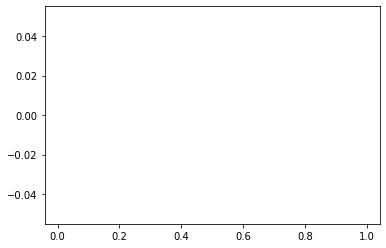

In [223]:
import matplotlib.pyplot as plt

# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x=final2[9050:18098], bins=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], color='#0504aa',
                            alpha=0.7, rwidth=0.85)

print(n)
#plt.grid(axis='y', alpha=0.75)
#plt.xlabel('Value')
#plt.ylabel('Frequency')
#plt.title('My Very Own Histogram')
#plt.text(23, 45, r'$\mu=15, b=3$')
#maxfreq = n.max()
# Set a clean upper y-axis limit.
#plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

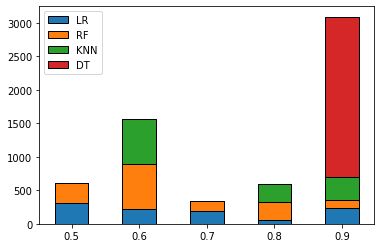

In [213]:
plt.legend(['LR', 'RF', 'KNN', 'DT'])
n,b1in, patches= plt.hist(final_final, align='left', bins=[0.5, 0.6, 0.7, 0.8, 0.9, 1], rwidth=0.5, stacked=True, edgecolor='black')
plt.legend(['LR', 'RF', 'KNN', 'DT'])

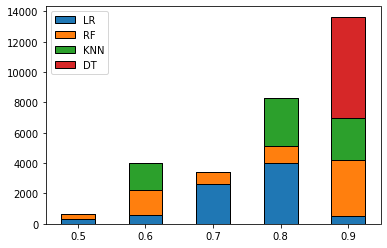

In [216]:
plt.legend(['LR', 'RF', 'KNN', 'DT'])
n,b1in, patches= plt.hist(final_final, align='left', bins=[0.5, 0.6, 0.7, 0.8, 0.9, 1], rwidth=0.5, stacked=True, edgecolor='black')
plt.legend(['LR', 'RF', 'KNN', 'DT'])

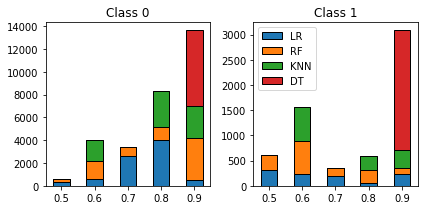

In [255]:
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.hist(final_final, align='left', bins=[0.5, 0.6, 0.7, 0.8, 0.9, 1], rwidth=0.5, stacked=True, edgecolor='black')
ax1.set_title('Class 0')
ax2.hist(final_final1, align='left', bins=[0.5, 0.6, 0.7, 0.8, 0.9, 1], rwidth=0.5, stacked=True, edgecolor='black')
ax2.set_title('Class 1')
f.tight_layout()
plt.legend(['LR', 'RF', 'KNN', 'DT'])
f.set_size_inches(6,2.8)
plt.savefig('voting.pdf')
plt.show()

<Figure size 432x288 with 0 Axes>

In [107]:
import numpy as np
final_result = pd.DataFrame(final_metrics)
final_result[3] = np.log(final_result[3])
final_result = final_result.transpose()
acc_f1 = pd.DataFrame(accuracy)
acc_f1['f1'] = f1
acc_f1 = pd.DataFrame(acc_f1).transpose()
acc = acc_f1.rename(index={0: 'accuracy', 1: 'f1'})
final_result = final_result.rename(index={0: 'statistical_parity_difference', 1: 'equal_opportunity_difference', 2: 'average_abs_odds_difference', 3: 'disparate_impact', 4: 'theil_index'})
final_result = pd.concat([acc,final_result])
final_result.columns = ['T' + str(col) for col in final_result.columns]
final_result.insert(0, "classifier", final_result['T' + str(len(list_estimators) - 1)])   ##Add final metrics add the beginning of the df
#final_result.to_csv('../../Results/VotingClassifier/' + nb_fname + '.csv')
final_result

,classifier,T0,T1,T2,T3
accuracy,0.812576,0.781302,0.806498,0.808156,0.812576
f1,0.440264,0.407662,0.405029,0.448539,0.440264
statistical_parity_difference,-0.066572,-0.063687,-0.059564,-0.074546,-0.066572
equal_opportunity_difference,-0.032983,-0.002994,-0.027154,-0.039369,-0.032983
average_abs_odds_difference,0.020277,0.010964,0.017036,0.027194,0.020277
disparate_impact,-1.079553,-0.643027,-1.106966,-1.022627,-1.079553
theil_index,0.203083,0.214830,0.211923,0.201688,0.203083
